In [ ]:
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 61 kB 234 kB/s 
     |████████████████████████████████| 135 kB 49.5 MB/s 
     |████████████████████████████████| 29.2 MB 23.9 MB/s 
     |████████████████████████████████| 563 kB 28.1 MB/s 
     |████████████████████████████████| 132 kB 42.1 MB/s 
     |████████████████████████████████| 508 kB 46.9 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 47 kB 2.0 MB/s 
     |████████████████████████████████| 133 kB 34.6 MB/s 
     |████████████████████████████████| 79.9 MB 97 kB/s 
     |████████████████████████████████| 106 kB 13.3 MB/s 
     |████████████████████████████████| 226 kB 67.1 MB/s 
     |████████████████████████████████| 13.2 MB 36.4 MB/s 
     |████████████████████████████████|

In [ ]:
pip install translators --upgrade 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 4.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 28.0 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14598 sha256=bcc3364efdeeb3c9390da1f9c8de277f8f6a2a8be1b4f335de4f221cafe313e6
  Stored in directory: /root/.cache/pip/wheels/9a/ee/03/da5c0b4a8c13362beeb844eb913bbe58a89bde1de2b9157007
Successfully built PyExecJS
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency

In [ ]:
import pandas as pd
import numpy as np
import translators as ts


# untuk membaca dataframe secara full (semua kolom terbaca walaupun panjang bgt/kolomnya banyak bgt)
pd.set_option('display.max_columns', None)

__Catatan:__
- 100*df.isna().sum()/len(df) -> biasanya digunakan untuk mencari persentase data NaN 
- ada 2 kolom yang sudah di-drop karena mengandung NaN diatas 50%
- semua proses penggabungan data `Sales_Performance` menggunakan metode join `inner` karena beririsan. 
- Irisan-irisan ini terinspirasi dari gambar berikut:

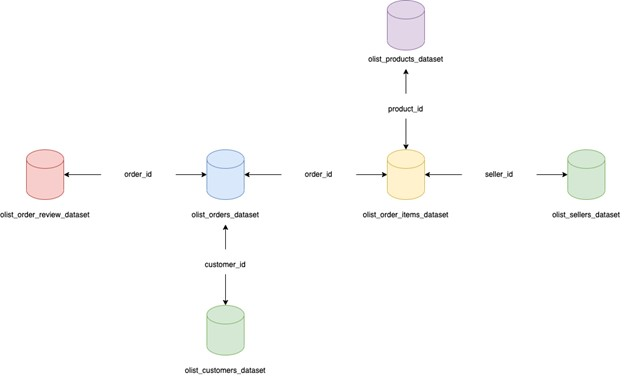

Proses-proses penggabungan : 
1. olist_orders_dataset dengan olist_customers_dataset
2. Nomor 1 dengan olist_order_reviews_dataset
3. Nomor 2 dengan olist_order_items_dataset
4. Nomor 3 dengan olist_products_dataset
5. Nomor 4 dengan olist_sellers_dataset

__Cara menggunakan google colab ini__:
1. Bikin folder namanya data
2. Upload semua data2 yang dibutuhkan ke dalam folder itu 
3. Klik Runtime - Run All


*Update*:
- Product_Category_Name sudah berhasil ditranslate tetapi tidak 100% akurat
- Untuk mengtranslate review_comment_title sepertinya sudah harus menggunakan NLP


### Customers

In [ ]:
customers = pd.read_csv('data/olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Orders 

In [ ]:
orders = pd.read_csv('data/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
customers_orders = pd.merge(customers, orders, 
                           how='inner', 
                           on='customer_id')
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [ ]:
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


### Order Review

In [ ]:
order_review = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
100*order_review.isna().sum()/len(order_review)

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

_"Menurut saya, kolom review_comment_title dan review_comment_message sebaiknya dihapus karena mengandung data NaN diatas 50%"_

In [ ]:
order_review.drop(columns=['review_comment_title', 'review_comment_message'], axis=1, inplace=True)

In [ ]:
order_review

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
customers_orders_gabung_order_review = pd.merge(customers_orders, order_review,
                                               how='inner',
                                               on='order_id')
customers_orders_gabung_order_review

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,36e2cdbaa9f639b57c53b37ac798fee8,4,2018-04-14 00:00:00,2018-04-28 11:15:04
99220,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,b273b431c3aedb4eed18643309652940,5,2018-04-12 00:00:00,2018-04-16 10:36:05
99221,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,fa4f16891e6b2edd1354668d07f5648b,1,2018-05-04 00:00:00,2018-05-08 01:41:07
99222,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,0bcdc9e450ea500811a8d39ee993cd47,5,2017-11-17 00:00:00,2017-11-19 23:34:18


In [ ]:
customers_orders_gabung_order_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99224 non-null  object
 1   customer_unique_id             99224 non-null  object
 2   customer_zip_code_prefix       99224 non-null  int64 
 3   customer_city                  99224 non-null  object
 4   customer_state                 99224 non-null  object
 5   order_id                       99224 non-null  object
 6   order_status                   99224 non-null  object
 7   order_purchase_timestamp       99224 non-null  object
 8   order_approved_at              99068 non-null  object
 9   order_delivered_carrier_date   97468 non-null  object
 10  order_delivered_customer_date  96359 non-null  object
 11  order_estimated_delivery_date  99224 non-null  object
 12  review_id                      99224 non-null  object
 13  r

In [ ]:
100*customers_orders_gabung_order_review.isna().sum() / len(customers_orders_gabung_order_review)

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.157220
order_delivered_carrier_date     1.769733
order_delivered_customer_date    2.887406
order_estimated_delivery_date    0.000000
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
review_answer_timestamp          0.000000
dtype: float64

In [ ]:
customers_orders_gabung_order_review['order_approved_at'].value_counts()

2018-02-27 04:31:10    9
2018-02-27 04:31:04    7
2018-02-06 05:31:52    7
2018-02-27 04:31:01    7
2018-01-10 10:32:03    7
                      ..
2018-06-03 18:31:05    1
2017-02-14 15:50:16    1
2018-04-17 12:30:05    1
2018-03-04 11:29:21    1
2018-04-08 20:30:03    1
Name: order_approved_at, Length: 90082, dtype: int64

In [ ]:
customers_orders_gabung_order_review['order_delivered_carrier_date'].value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-17 14:16:00    15
                       ..
2018-02-15 20:54:42     1
2017-10-26 16:59:01     1
2017-07-26 15:53:51     1
2017-12-16 00:55:02     1
2017-12-21 19:17:21     1
Name: order_delivered_carrier_date, Length: 80451, dtype: int64

In [ ]:
customers_orders_gabung_order_review['order_delivered_customer_date'].value_counts()

2018-04-16 15:48:28    3
2018-07-24 21:36:42    3
2018-03-08 23:34:31    3
2018-04-06 17:38:34    3
2017-06-05 15:36:06    3
                      ..
2017-07-27 16:08:06    1
2018-08-29 10:28:47    1
2018-08-09 13:06:46    1
2018-05-10 19:05:36    1
2017-12-26 18:42:36    1
Name: order_delivered_customer_date, Length: 95022, dtype: int64

### list order items

In [ ]:
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
customers_orders_gabung_order_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99224 non-null  object
 1   customer_unique_id             99224 non-null  object
 2   customer_zip_code_prefix       99224 non-null  int64 
 3   customer_city                  99224 non-null  object
 4   customer_state                 99224 non-null  object
 5   order_id                       99224 non-null  object
 6   order_status                   99224 non-null  object
 7   order_purchase_timestamp       99224 non-null  object
 8   order_approved_at              99068 non-null  object
 9   order_delivered_carrier_date   97468 non-null  object
 10  order_delivered_customer_date  96359 non-null  object
 11  order_estimated_delivery_date  99224 non-null  object
 12  review_id                      99224 non-null  object
 13  r

In [ ]:
empat_data = pd.merge(customers_orders_gabung_order_review, order_items,
                     how='inner', 
                     on='order_id')
empat_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30 00:00:00,2018-02-10 22:43:29,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,2018-06-15 00:00:00,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29 00:00:00,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,36e2cdbaa9f639b57c53b37ac798fee8,4,2018-04-14 00:00:00,2018-04-28 11:15:04,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112368,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,b273b431c3aedb4eed18643309652940,5,2018-04-12 00:00:00,2018-04-16 10:36:05,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112369,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,fa4f16891e6b2edd1354668d07f5648b,1,2018-05-04 00:00:00,2018-05-08 01:41:07,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112370,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,0bcdc9e450ea50081

In [ ]:
empat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112372 non-null  object 
 1   customer_unique_id             112372 non-null  object 
 2   customer_zip_code_prefix       112372 non-null  int64  
 3   customer_city                  112372 non-null  object 
 4   customer_state                 112372 non-null  object 
 5   order_id                       112372 non-null  object 
 6   order_status                   112372 non-null  object 
 7   order_purchase_timestamp       112372 non-null  object 
 8   order_approved_at              112357 non-null  object 
 9   order_delivered_carrier_date   111188 non-null  object 
 10  order_delivered_customer_date  110012 non-null  object 
 11  order_estimated_delivery_date  112372 non-null  object 
 12  review_id                     

In [ ]:
100*empat_data.isna().sum()/len(empat_data)

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.013349
order_delivered_carrier_date     1.053643
order_delivered_customer_date    2.100167
order_estimated_delivery_date    0.000000
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
review_answer_timestamp          0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
dtype: float64

### Products

In [ ]:
products = pd.read_csv('data/olist_products_dataset.csv')
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
100*products.isna().sum()/len(products)


product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

_"Apakah sebaiknya data yang mengandung NaN dihapus?"_

In [ ]:
products[products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
100*610 / len(products)

1.8512336499650996

_"Hanya ada 1.851% data NaN... sebaiknya dihapus saja"_

In [ ]:
products.dropna(inplace=True)

In [ ]:
100*products.isna().sum()/len(products)


product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

In [ ]:
empat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112372 non-null  object 
 1   customer_unique_id             112372 non-null  object 
 2   customer_zip_code_prefix       112372 non-null  int64  
 3   customer_city                  112372 non-null  object 
 4   customer_state                 112372 non-null  object 
 5   order_id                       112372 non-null  object 
 6   order_status                   112372 non-null  object 
 7   order_purchase_timestamp       112372 non-null  object 
 8   order_approved_at              112357 non-null  object 
 9   order_delivered_carrier_date   111188 non-null  object 
 10  order_delivered_customer_date  110012 non-null  object 
 11  order_estimated_delivery_date  112372 non-null  object 
 12  review_id                     

In [ ]:
lima_data = pd.merge(empat_data, products, 
                    how='inner', 
                    on='product_id')
lima_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110768,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-17 04:31:33,2018-07-25 11:18:00,2018-07-26 19:18:32,2018-07-30 00:00:00,17e0e42ddf0dd7ebceff457b7c1da303,3,2018-07-27 00:00:00,2018-07-29 22:34:18,1,9682ad2500ae8b2609e6a88eb0cbc5bb,0bf0150d5b9d60d9cd2906003332f085,2018-07-25 04:31:33,99.90,21.14,casa_conforto,32.0,373.0,1.0,1500.0,45.0,30.0,45.0
110769,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,2017-03-30 17:06:19,2017-04-13 00:00:00,f3642bae4843d919c4c53ec1ff8fe26d,4,2017-03-31 00:00:00,2017-04-04 01:37:20,1,aea06073397f809424f946979354c9f0,f45122a9ab94eb4f3f8953578bc0c560,2017-04-02 23:23:38,19.99,10.96,pet_shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
110770,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd104

In [ ]:
100*lima_data.isna().sum()/len(lima_data)

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012638
order_delivered_carrier_date     1.035451
order_delivered_customer_date    2.071805
order_estimated_delivery_date    0.000000
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
review_answer_timestamp          0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name            0.000000
product_name_lenght              0

### Sellers 

In [ ]:
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sales_performance = pd.merge(lima_data, sellers, 
                            how='inner', 
                            on='seller_id')
sales_performance

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110768,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,sao manuel,SP,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaN,NaN,2018-07-30 00:00:00,2bb20c7f19a9aa625bd8e6ba9f000f27,3,2018-08-01 00:00:00,2018-08-01 15:23:32,1,4444290d1f0ec9579d5b21dc589251c0,4ce6e5f6c52515177e18c1c9361d8677,2018-07-22 22:20:45,226.60,25.67,automotivo,51.0,680.0,1.0,4150.0,68.0,12.0,68.0,9895,sao bernardo do campo,SP
110769,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27 00:00:00,709ee020ff826ee5289d7dd5d6911d0c,5,2018-08-14 00:00:00,2018-08-15 11:31:29,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,2018-08-08 18:5

In [ ]:
100*sales_performance.isna().sum()/len(sales_performance)

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012638
order_delivered_carrier_date     1.035451
order_delivered_customer_date    2.071805
order_estimated_delivery_date    0.000000
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
review_answer_timestamp          0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name            0.000000
product_name_lenght              0

In [ ]:
sales_performance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 110772
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    110773 non-null  object 
 1   customer_unique_id             110773 non-null  object 
 2   customer_zip_code_prefix       110773 non-null  int64  
 3   customer_city                  110773 non-null  object 
 4   customer_state                 110773 non-null  object 
 5   order_id                       110773 non-null  object 
 6   order_status                   110773 non-null  object 
 7   order_purchase_timestamp       110773 non-null  object 
 8   order_approved_at              110759 non-null  object 
 9   order_delivered_carrier_date   109626 non-null  object 
 10  order_delivered_customer_date  108478 non-null  object 
 11  order_estimated_delivery_date  110773 non-null  object 
 12  review_id                     

_"Belum tahu kelanjutannya.."_ 

In [ ]:
sales_performance

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110768,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,sao manuel,SP,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaN,NaN,2018-07-30 00:00:00,2bb20c7f19a9aa625bd8e6ba9f000f27,3,2018-08-01 00:00:00,2018-08-01 15:23:32,1,4444290d1f0ec9579d5b21dc589251c0,4ce6e5f6c52515177e18c1c9361d8677,2018-07-22 22:20:45,226.60,25.67,automotivo,51.0,680.0,1.0,4150.0,68.0,12.0,68.0,9895,sao bernardo do campo,SP
110769,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27 00:00:00,709ee020ff826ee5289d7dd5d6911d0c,5,2018-08-14 00:00:00,2018-08-15 11:31:29,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,2018-08-08 18:5

In [ ]:
sales_performance1 = sales_performance.copy()

In [ ]:
sales_performance1['product_category_name'] = sales_performance1['product_category_name'].str.replace('_', ' ')

In [ ]:
sales_performance1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110768,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,sao manuel,SP,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaN,NaN,2018-07-30 00:00:00,2bb20c7f19a9aa625bd8e6ba9f000f27,3,2018-08-01 00:00:00,2018-08-01 15:23:32,1,4444290d1f0ec9579d5b21dc589251c0,4ce6e5f6c52515177e18c1c9361d8677,2018-07-22 22:20:45,226.60,25.67,automotivo,51.0,680.0,1.0,4150.0,68.0,12.0,68.0,9895,sao bernardo do campo,SP
110769,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2018-08-27 00:00:00,709ee020ff826ee5289d7dd5d6911d0c,5,2018-08-14 00:00:00,2018-08-15 11:31:29,1,a2fce4213a6ac271129618259a334261,9140ef75cc8211c4035935e80e567204,2018-08-08 18:5

In [ ]:
sales_performance1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 110772
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    110773 non-null  object 
 1   customer_unique_id             110773 non-null  object 
 2   customer_zip_code_prefix       110773 non-null  int64  
 3   customer_city                  110773 non-null  object 
 4   customer_state                 110773 non-null  object 
 5   order_id                       110773 non-null  object 
 6   order_status                   110773 non-null  object 
 7   order_purchase_timestamp       110773 non-null  object 
 8   order_approved_at              110759 non-null  object 
 9   order_delivered_carrier_date   109626 non-null  object 
 10  order_delivered_customer_date  108478 non-null  object 
 11  order_estimated_delivery_date  110773 non-null  object 
 12  review_id                     

### Translate product_category_name

In [ ]:
# Mencoba translate sebuah kalimat
ts.google('moveis_escritorio', from_language='pt', to_language='en') 

'Furniture office'

In [ ]:
kategori_portugis = (sales_performance1['product_category_name'].astype(str) ## ubah dulu type nya ke dalam string supaya bisa dipakai oleh ts.google
                    .value_counts()
                    .index.unique()
                    )

In [ ]:
hasil_terjemahan = {}
for kategori in kategori_portugis:
  hasil_terjemahan[kategori] = ts.google(kategori, from_language='auto', to_language='en')

hasil_terjemahan

{'agro industria e comercio': 'agro industry and trade',
 'alimentos': 'foods',
 'alimentos bebidas': 'Drink foods',
 'artes': 'artes',
 'artes e artesanato': 'Arts and Crafts',
 'artigos de festas': 'party articles',
 'artigos de natal': 'Christmas articles',
 'audio': 'audio',
 'automotivo': 'automotive',
 'bebes': 'babies',
 'bebidas': 'drinks',
 'beleza saude': 'HEALTH BEAUTY',
 'brinquedos': 'toys',
 'cama mesa banho': 'bed table bath',
 'casa conforto': 'House comfort',
 'casa conforto 2': 'House Comfort 2',
 'casa construcao': 'Casa Construcao',
 'cds dvds musicais': 'cds dvds musicais',
 'cine foto': 'Photo cinema',
 'climatizacao': 'climatization',
 'consoles games': 'consoles games',
 'construcao ferramentas construcao': 'Construction Tools Construction',
 'construcao ferramentas ferramentas': 'Construction Tools Tools',
 'construcao ferramentas iluminacao': 'Construction Tools Illumination',
 'construcao ferramentas jardim': 'Construction Tools Garden',
 'construcao ferramen

In [ ]:
sales_performance1['product_category_name'] = sales_performance1['product_category_name'].map(hasil_terjemahan)

### Extract Month, Weekday, Hour

In [ ]:
sales_performance1['order_purchase_timestamp'] = sales_performance1['order_purchase_timestamp'].astype('datetime64[ns]')

In [ ]:
sales_performance1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 110772
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    110773 non-null  object        
 1   customer_unique_id             110773 non-null  object        
 2   customer_zip_code_prefix       110773 non-null  int64         
 3   customer_city                  110773 non-null  object        
 4   customer_state                 110773 non-null  object        
 5   order_id                       110773 non-null  object        
 6   order_status                   110773 non-null  object        
 7   order_purchase_timestamp       110773 non-null  datetime64[ns]
 8   order_approved_at              110759 non-null  object        
 9   order_delivered_carrier_date   109626 non-null  object        
 10  order_delivered_customer_date  108478 non-null  object        
 11  

In [ ]:
sales_performance1['month_of_purchase'] = sales_performance1['order_purchase_timestamp'].dt.month_name()
sales_performance1['weekday_of_purchase'] = sales_performance1['order_purchase_timestamp'].dt.day_name()
sales_performance1['hour_of_purchase'] = sales_performance1['order_purchase_timestamp'].dt.strftime("%H:%M")


## Berikut adalah fungsi untuk mendapatkan bagian dalam suatu hari 
def get_part_of_day(h):
    return (
        "morning"
        if 5 <= h <= 11
        else "afternoon"
        if 12 <= h <= 17
        else "evening"
        if 18 <= h <= 22
        else "night"
    )

sales_performance1['part_of_day_of_purchase'] = sales_performance1['order_purchase_timestamp'].dt.hour.apply(get_part_of_day)
sales_performance1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,month_of_purchase,weekday_of_purchase,hour_of_purchase,part_of_day_of_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,May,Tuesday,15:05,afternoon
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,November,Thursday,00:50,night
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,November,Thursday,00:50,night
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,May,Sunday,20:11,evening
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,February,Saturday,19:45,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110768,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,sao manuel,SP,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaN,NaN,2018-07-30 00:00:00,2bb20c7f19a9aa625bd8e6ba9f000f27,3,2018-08-01 00:00:00,2018-08-01 15:23:32,1,4444290d1f0ec9579d5b21dc589251c0,4ce6e5f6c52515177e18c1c9361d8677,2018-07-22 22:20:45,226.60,25.67,automotive,51.0,680.0,1.0,4150.0,68.0,12.0,68.0,9895,sao bernardo do campo,SP,July,Monday,22:08,evening
110769,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,deliver

In [ ]:

# sales_performance1.to_excel("Sales_Performance1.xlsx", index=False)

### Marketing Data

In [ ]:
marketing = pd.read_excel('/content/data/marketing_data.xlsx')
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",3/7/13,99,372,18,126,47,5,4,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1/22/13,99,5,10,13,3,1,8,0,0,0,0,0
2237,22,1976,Graduation,Divorced,"$46,310.00",12/3/12,99,185,2,88,15,6,8,0,0,0,0,0
2238,528,1978,Graduation,Married,"$65,819.00",11/29/12,99,267,38,701,149,5,3,0,0,0,0,0


In [ ]:
marketing['Monetary'] = marketing[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']].sum(axis=1)
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0,783
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1,540
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0,219
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0,11
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",3/7/13,99,372,18,126,47,5,4,0,0,0,0,0,563
2236,5263,1977,2n Cycle,Married,"$31,056.00",1/22/13,99,5,10,13,3,1,8,0,0,0,0,0,31
2237,22,1976,Graduation,Divorced,"$46,310.00",12/3/12,99,185,2,88,15,6,8,0,0,0,0,0,290
2238,528,1978,Graduation,Married,"$65,819.00",11/29/12,99,267,38,701,149,5,3,0,0,0,0,0,1155


In [ ]:
## membuat rating recency dimulai dari bins untuk rating 0-14 < 14-30 < 30-45 < 45-75 < 75-100
marketing['Recency_Rating'] = pd.cut(x=marketing['Recency'], 
       bins=[0, 14, 30, 45, 75, 99], 
       labels=['5', '4', '3', '2', '1'], ## Label harus menerima tipe data str
       include_lowest=True, ## supaya nilai terendah (0) ikut masuk bin 
       )

## membuat rating monetary dimulai dari bins untuk rating (<100) < 1000-499 < 500-999 < 1000-2000 < (>2000)
marketing['Monetary_Rating'] = pd.cut(x=marketing['Monetary'], 
       bins=[0, 100, 500, 1000, 2001, np.inf], 
       labels=['1', '2', '3', '4', '5'], ## Label harus menerima tipe data str
       right = False)

## membuat rating frequency dimulai dari bins untuk rating (<100) < 1000-499 < 500-999 < 1000-2000 < (>2000)
marketing['Frequency_Rating'] = pd.cut(x=marketing['NumWebPurchases'], 
       bins=[0, 5, 10, 15, 21, np.inf], 
       labels=['1', '2', '3', '4', '5'], ## Label harus menerima tipe data str
       right = False)

marketing

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary,Recency_Rating,Monetary_Rating,Frequency_Rating
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0,783,5,3,1
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1,540,5,3,2
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0,219,5,2,1
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0,11,5,1,1
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0,57,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",3/7/13,99,372,18,126,47,5,4,0,0,0,0,0,563,1,3,2
2236,5263,1977,2n Cycle,Married,"$31,056.00",1/22/13,99,5,10,13,3,1,8,0,0,0,0,0,31,1,1,1
2237,22,1976,Graduation,Divorced,"$46,310.00",12/3/12,99,185,2,88,15,6,8,0,0,0,0,0,290,1,2,2
2238,528,1978,Graduation,Married,"$65,819.00",11/29/12,99,267,38,701,149,5,3,0,0,0,0,0,1155,1,4,2


In [ ]:
marketing['RFM_Rating'] = marketing[['Recency_Rating', 'Frequency_Rating', 'Monetary_Rating']].astype(int).mean(axis=1).apply(round)
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary,Recency_Rating,Monetary_Rating,Frequency_Rating,RFM_Rating
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0,783,5,3,1,3
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1,540,5,3,2,3
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0,219,5,2,1,3
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0,11,5,1,1,2
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0,57,5,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",3/7/13,99,372,18,126,47,5,4,0,0,0,0,0,563,1,3,2,2
2236,5263,1977,2n Cycle,Married,"$31,056.00",1/22/13,99,5,10,13,3,1,8,0,0,0,0,0,31,1,1,1,1
2237,22,1976,Graduation,Divorced,"$46,310.00",12/3/12,99,185,2,88,15,6,8,0,0,0,0,0,290,1,2,2,2
2238,528,1978,Graduation,Married,"$65,819.00",11/29/12,99,267,38,701,149,5,3,0,0,0,0,0,1155,1,4,2,2


In [ ]:
## Cutomer Labelling menggunakan regex 
segmentasi_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cannot_loose_them',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

marketing['Customer_Label'] =(marketing['Recency_Rating'].astype(str) + marketing['Frequency_Rating'].astype(str)).replace(segmentasi_map, regex=True)
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary,Recency_Rating,Monetary_Rating,Frequency_Rating,RFM_Rating,Customer_Label
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0,783,5,3,1,3,new_customers
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1,540,5,3,2,3,potential_loyalists
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0,219,5,2,1,3,new_customers
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0,11,5,1,1,2,new_customers
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0,57,5,1,1,2,new_customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",3/7/13,99,372,18,126,47,5,4,0,0,0,0,0,563,1,3,2,2,hibernating
2236,5263,1977,2n Cycle,Married,"$31,056.00",1/22/13,99,5,10,13,3,1,8,0,0,0,0,0,31,1,1,1,1,hibernating
2237,22,1976,Graduation,Divorced,"$46,310.00",12/3/12,99,185,2,88,15,6,8,0,0,0,0,0,290,1,2,2,2,hibernating
2238,528,1978,Graduation,Married,"$65,819.00",11/29/12,99,267,38,701,149,5,3,0,0,0,0,0,1155,1,4,2,2,hibernating


In [ ]:
sales_marketing = pd.merge(sales_performance1, marketing, 
                           left_index=True, right_index=True,
                           how='outer')
sales_marketing

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,month_of_purchase,weekday_of_purchase,hour_of_purchase,part_of_day_of_purchase,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary,Recency_Rating,Monetary_Rating,Frequency_Rating,RFM_Rating,Customer_Label
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,May,Tuesday,15:05,afternoon,1826.0,1970.0,Graduation,Divorced,"$84,835.00",6/16/14,0.0,189.0,104.0,379.0,111.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,783.0,5,3,1,3.0,new_customers
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,1.0,1961.0,Graduation,Single,"$57,091.00",6/15/14,0.0,464.0,5.0,64.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,540.0,5,3,2,3.0,potential_loyalists
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,10476.0,1958.0,Graduation,Married,"$67,267.00",5/13/14,0.0,134.0,11.0,59.0,15.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,219.0,5,2,1,3.0,new_customers
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,Furniture office,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,May,Sunday,20:11,evening,1386.0,1967.0,Graduation,Together,"$32,474.00",5/11/14,0.0,10.0,0.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,11.0,5,1,1,2.0,new_customers
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,Furniture office,41.0,1141.0,

In [ ]:
# sales_marketing.to_excel('sales_marketing1.xlsx', index=False)

### AB-Testing

In [ ]:
!pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 8.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# import pandas as pd
# import numpy as np 

from statsmodels.stats.proportion import power_proportions_2indep, test_proportions_2indep
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.power import tt_ind_solve_power
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/ab.csv')
df.sort_values(by='timestamp')

,user_id,timestamp,group,landing_page,converted
131228,922696,2017-01-02 13:42:05.378582,treatment,new_page,0
184884,781507,2017-01-02 13:42:15.234051,control,old_page,0
83878,737319,2017-01-02 13:42:21.786186,control,old_page,0
102717,818377,2017-01-02 13:42:26.640581,treatment,new_page,0
158789,725857,2017-01-02 13:42:27.851110,treatment,new_page,0
...,...,...,...,...,...
153305,851645,2017-01-24 13:41:18.869978,treatment,old_page,0
47535,808330,2017-01-24 13:41:19.152664,control,old_page,0
157787,843121,2017-01-24 13:41:44.097174,treatment,new_page,0
179072,836373,2017-01-24 13:41:52.604673,control,old_page,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [ ]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [ ]:
df['landing_page'].value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [ ]:
data = df.copy().drop(columns=['user_id', 'landing_page'])
data

,timestamp,group,converted
0,2017-01-21 22:11:48.556739,control,0
1,2017-01-12 08:01:45.159739,control,0
2,2017-01-11 16:55:06.154213,treatment,0
3,2017-01-08 18:28:03.143765,treatment,0
4,2017-01-21 01:52:26.210827,control,1
...,...,...,...
294473,2017-01-03 22:28:38.630509,control,0
294474,2017-01-12 00:51:57.078372,control,0
294475,2017-01-22 11:45:03.439544,control,0
294476,2017-01-15 01:20:28.957438,control,0


#### Ekstrak tanggal dari timestamp

In [ ]:
data['date'] = pd.to_datetime(data['timestamp']).dt.date
data.sort_values(by='timestamp')

,timestamp,group,converted,date
131228,2017-01-02 13:42:05.378582,treatment,0,2017-01-02
184884,2017-01-02 13:42:15.234051,control,0,2017-01-02
83878,2017-01-02 13:42:21.786186,control,0,2017-01-02
102717,2017-01-02 13:42:26.640581,treatment,0,2017-01-02
158789,2017-01-02 13:42:27.851110,treatment,0,2017-01-02
...,...,...,...,...
153305,2017-01-24 13:41:18.869978,treatment,0,2017-01-24
47535,2017-01-24 13:41:19.152664,control,0,2017-01-24
157787,2017-01-24 13:41:44.097174,treatment,0,2017-01-24
179072,2017-01-24 13:41:52.604673,control,0,2017-01-24


#### Jumlah Visit, Converted yang di group by date

In [ ]:
ab_test = data[['group', 'converted', 'date']]
ab_test

,group,converted,date
0,control,0,2017-01-21
1,control,0,2017-01-12
2,treatment,0,2017-01-11
3,treatment,0,2017-01-08
4,control,1,2017-01-21
...,...,...,...
294473,control,0,2017-01-03
294474,control,0,2017-01-12
294475,control,0,2017-01-22
294476,control,0,2017-01-15


In [ ]:
## Mengambil value dari control_visit, treatment_visit, control_converted, treatment_converted berdasarkan  
valuenya = ab_test.groupby(['date', 'group']).agg(['count', 'sum']).unstack().reset_index().values
valuenya

array([[datetime.date(2017, 1, 2), 2894, 2889, 362, 348],
       [datetime.date(2017, 1, 3), 6684, 6710, 760, 762],
       [datetime.date(2017, 1, 4), 6655, 6629, 810, 773],
       [datetime.date(2017, 1, 5), 6538, 6586, 801, 758],
       [datetime.date(2017, 1, 6), 6684, 6844, 778, 848],
       [datetime.date(2017, 1, 7), 6678, 6703, 805, 776],
       [datetime.date(2017, 1, 8), 6769, 6795, 805, 821],
       [datetime.date(2017, 1, 9), 6725, 6714, 806, 794],
       [datetime.date(2017, 1, 10), 6745, 6778, 763, 858],
       [datetime.date(2017, 1, 11), 6787, 6766, 808, 785],
       [datetime.date(2017, 1, 12), 6615, 6707, 809, 820],
       [datetime.date(2017, 1, 13), 6649, 6589, 779, 734],
       [datetime.date(2017, 1, 14), 6635, 6694, 842, 799],
       [datetime.date(2017, 1, 15), 6809, 6640, 823, 757],
       [datetime.date(2017, 1, 16), 6683, 6644, 816, 795],
       [datetime.date(2017, 1, 17), 6691, 6631, 818, 844],
       [datetime.date(2017, 1, 18), 6578, 6707, 820, 835],
     

In [ ]:
ab_test = pd.DataFrame(valuenya, columns=['date_ab_test', 'control_visit', 'treatment_visit', 'control_converted', 'treatment_converted'])


In [ ]:
ab_test_ready = ab_test.set_index('date_ab_test').cumsum() #cummulative sum
ab_test_ready

,control_visit,treatment_visit,control_converted,treatment_converted
date_ab_test,,,,
2017-01-02,2894,2889,362,348
2017-01-03,9578,9599,1122,1110
2017-01-04,16233,16228,1932,1883
2017-01-05,22771,22814,2733,2641
2017-01-06,29455,29658,3511,3489
2017-01-07,36133,36361,4316,4265
2017-01-08,42902,43156,5121,5086
2017-01-09,49627,49870,5927,5880
2017-01-10,56372,56648,6690,6738


In [ ]:
ab_test_ready['control_converted_rate'] = ab_test_ready['control_converted'] / ab_test_ready['control_visit'] 
ab_test_ready['treatment_converted_rate'] = ab_test_ready['treatment_converted'] / ab_test_ready['treatment_visit'] 
ab_test_ready

,control_visit,treatment_visit,control_converted,treatment_converted,control_converted_rate,treatment_converted_rate
date_ab_test,,,,,,
2017-01-02,2894,2889,362,348,0.125086,0.120457
2017-01-03,9578,9599,1122,1110,0.117143,0.115637
2017-01-04,16233,16228,1932,1883,0.119017,0.116034
2017-01-05,22771,22814,2733,2641,0.120021,0.115762
2017-01-06,29455,29658,3511,3489,0.119199,0.117641
2017-01-07,36133,36361,4316,4265,0.119448,0.117296
2017-01-08,42902,43156,5121,5086,0.119365,0.117852
2017-01-09,49627,49870,5927,5880,0.119431,0.117907
2017-01-10,56372,56648,6690,6738,0.118676,0.118945


In [ ]:
def p_value(ab_test_ready):

  result = test_proportions_2indep(count1=ab_test_ready["treatment_converted"], 
                                   nobs1=ab_test_ready["treatment_visit"], 
                                   count2=ab_test_ready["control_converted"], 
                                   nobs2=ab_test_ready["control_visit"],
                                   alternative="two-sided")
  return result[1]

In [ ]:
def power(ab_test_ready):

  test_split = ab_test_ready['treatment_visit'] / (ab_test_ready['treatment_visit'] + ab_test_ready['control_visit'])
  relative_effect = (ab_test_ready['treatment_converted_rate'] - ab_test_ready['control_converted_rate'])/ab_test_ready['control_converted_rate']  

  power_result = power_proportions_2indep(diff=ab_test_ready['control_converted_rate'] * relative_effect,
                                               prop2=ab_test_ready['control_converted_rate'], 
                                               nobs1=ab_test_ready['treatment_visit'],
                                               ratio=(1-test_split)/test_split,
                                               alpha=0.05,
                                               alternative='two-sided',
                                               return_results=False)
  return power_result

In [ ]:
ab_test_ready['p_value'] = ab_test_ready.apply(p_value, axis=1)
ab_test_ready['power'] = ab_test_ready.apply(power, axis=1)

In [ ]:
ab_test_ready

,control_visit,treatment_visit,control_converted,treatment_converted,control_converted_rate,treatment_converted_rate,p_value,power
date_ab_test,,,,,,,,
2017-01-02,2894,2889,362,348,0.125086,0.120457,0.592186,0.081031
2017-01-03,9578,9599,1122,1110,0.117143,0.115637,0.745064,0.061902
2017-01-04,16233,16228,1932,1883,0.119017,0.116034,0.404180,0.128529
2017-01-05,22771,22814,2733,2641,0.120021,0.115762,0.158646,0.274735
2017-01-06,29455,29658,3511,3489,0.119199,0.117641,0.557845,0.089255
2017-01-07,36133,36361,4316,4265,0.119448,0.117296,0.369942,0.142723
2017-01-08,42902,43156,5121,5086,0.119365,0.117852,0.492331,0.104243
2017-01-09,49627,49870,5927,5880,0.119431,0.117907,0.457241,0.113778
2017-01-10,56372,56648,6690,6738,0.118676,0.118945,0.888844,0.052258


In [ ]:
ab_test_ready.to_excel('ab_test_result.xlsx')

# Mencari Repeat Order dan Menggabungkan AB-Testing 

In [ ]:
df = sales_marketing
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,month_of_purchase,weekday_of_purchase,hour_of_purchase,part_of_day_of_purchase,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary,Recency_Rating,Monetary_Rating,Frequency_Rating,RFM_Rating,Customer_Label
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Tuesday,15:05,afternoon,1826.0,1970.0,Graduation,Divorced,"$84,835.00",6/16/14,0.0,189.0,104.0,379.0,111.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,783.0,5.0,3.0,1.0,3.0,new_customers
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,1.0,1961.0,Graduation,Single,"$57,091.00",6/15/14,0.0,464.0,5.0,64.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,540.0,5.0,3.0,2.0,3.0,potential_loyalists
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,10476.0,1958.0,Graduation,Married,"$67,267.00",5/13/14,0.0,134.0,11.0,59.0,15.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,219.0,5.0,2.0,1.0,3.0,new_customers
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Sunday,20:11,evening,1386.0,1967.0,Graduation,Together,"$32,474.00",5/11/14,0.0,10.0,0.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1.0,1.0,2.0,new_customers
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba

In [ ]:
sales_performance = df.iloc[:, :37]
sales_performance

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,month_of_purchase,weekday_of_purchase,hour_of_purchase,part_of_day_of_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Tuesday,15:05,afternoon
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Sunday,20:11,evening
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,February,Saturday,19:45,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110768,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,sao manuel,SP,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaN,NaN,2018-07-30 00:00:00,2bb20c7f19a9aa625bd8e6ba9f000f27,3,2018-08-01 00:00:00,2018-08-01 15:23:32,1,4444290d1f0ec9579d5b21dc589251c0,4ce6e5f6c52515177e18c1c9361d8677,2018-07-22 22:20:45,226.60,25.67,automotive,51,680,1,4150,68,12,68,9895,sao bernardo do campo,SP,July,Monday,22:08,evening
110769,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,2018-08-13 23:16:46,2

## Repeat Order

In [ ]:
# 
customer = sales_performance.groupby('customer_unique_id').nunique()[['customer_id', 'order_purchase_timestamp']]
customer

,customer_id,order_purchase_timestamp
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
0000f46a3911fa3c0805444483337064,1,1
0000f6ccb0745a6a4b88665a16c9f078,1,1
0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,1
fffea47cd6d3cc0a88bd621562a9d061,1,1
ffff371b4d645b6ecea244b27531430a,1,1


In [ ]:
customer[(customer['customer_id'] > 1) & (customer['order_purchase_timestamp'] > 1)].sort_values(by='customer_id')

,customer_id,order_purchase_timestamp
customer_unique_id,,
004288347e5e88a27ded2bb23747066c,2,2
a2ee01609cebac76651bfc4814f5500e,2,2
a30af9d68fbfcafb8451854c528587f5,2,2
a31ef19138e1e8ddad1c8c30612a044d,2,2
a327e19095ffb086d25f7ee477c9d3c6,2,2
...,...,...
6469f99c1f9dfae7733b25662e7f1782,7,7
ca77025e7201e3b30c44b472ff346268,7,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7


In [ ]:
customer = customer.reset_index()

In [ ]:
def status_repeat(df):
  if (df['customer_id'] > 1) and (df['order_purchase_timestamp'] > 1):
    return 'yes'
  return 'no'

In [ ]:
customer['Repeat_Order'] = customer.apply(status_repeat, axis=1)
customer

,customer_unique_id,customer_id,order_purchase_timestamp,Repeat_Order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,no
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,no
2,0000f46a3911fa3c0805444483337064,1,1,no
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,no
4,0004aac84e0df4da2b147fca70cf8255,1,1,no
...,...,...,...,...
93411,fffcf5a5ff07b0908bd4e2dbc735a684,1,1,no
93412,fffea47cd6d3cc0a88bd621562a9d061,1,1,no
93413,ffff371b4d645b6ecea244b27531430a,1,1,no
93414,ffff5962728ec6157033ef9805bacc48,1,1,no


In [ ]:
customer.columns = ['customer_unique_id', 'banyak_customer_id', 'banyak_order_purchase_timestamp','Repeat_Order']
customer

,customer_unique_id,banyak_customer_id,banyak_order_purchase_timestamp,Repeat_Order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,no
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,no
2,0000f46a3911fa3c0805444483337064,1,1,no
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,no
4,0004aac84e0df4da2b147fca70cf8255,1,1,no
...,...,...,...,...
93411,fffcf5a5ff07b0908bd4e2dbc735a684,1,1,no
93412,fffea47cd6d3cc0a88bd621562a9d061,1,1,no
93413,ffff371b4d645b6ecea244b27531430a,1,1,no
93414,ffff5962728ec6157033ef9805bacc48,1,1,no


In [ ]:
sales_marketing_repeat_order = pd.merge(df, customer,
         how='left',
         on='customer_unique_id')
sales_marketing_repeat_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,month_of_purchase,weekday_of_purchase,hour_of_purchase,part_of_day_of_purchase,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary,Recency_Rating,Monetary_Rating,Frequency_Rating,RFM_Rating,Customer_Label,banyak_customer_id,banyak_order_purchase_timestamp,Repeat_Order
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Tuesday,15:05,afternoon,1826.0,1970.0,Graduation,Divorced,"$84,835.00",6/16/14,0.0,189.0,104.0,379.0,111.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,783.0,5.0,3.0,1.0,3.0,new_customers,1,1,no
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,1.0,1961.0,Graduation,Single,"$57,091.00",6/15/14,0.0,464.0,5.0,64.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,540.0,5.0,3.0,2.0,3.0,potential_loyalists,1,1,no
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,10476.0,1958.0,Graduation,Married,"$67,267.00",5/13/14,0.0,134.0,11.0,59.0,15.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,219.0,5.0,2.0,1.0,3.0,new_customers,1,1,no
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Sunday,20:11,evening,1386.0,1967.0,Graduation,Together,"$32,474.00",5/11/14,0.0,10.0,0.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1.0,1.0,2.0,new_customers,1,1,no
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,f7123bac5b91a0e2e38d8b41fd1206f4,4,2018-03-01 00:00:00,2018-03-02 11:11:24,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,20

In [ ]:
ab_result = pd.read_excel('ab_test_result.xlsx')
ab_result

,date_ab_test,control_visit,treatment_visit,control_converted,treatment_converted,control_converted_rate,treatment_converted_rate,p_value,power
0,2017-01-02,2894,2889,362,348,0.125086,0.120457,0.592186,0.081031
1,2017-01-03,9578,9599,1122,1110,0.117143,0.115637,0.745064,0.061902
2,2017-01-04,16233,16228,1932,1883,0.119017,0.116034,0.404180,0.128529
3,2017-01-05,22771,22814,2733,2641,0.120021,0.115762,0.158646,0.274735
4,2017-01-06,29455,29658,3511,3489,0.119199,0.117641,0.557845,0.089255
5,2017-01-07,36133,36361,4316,4265,0.119448,0.117296,0.369942,0.142723
6,2017-01-08,42902,43156,5121,5086,0.119365,0.117852,0.492331,0.104243
7,2017-01-09,49627,49870,5927,5880,0.119431,0.117907,0.457241,0.113778
8,2017-01-10,56372,56648,6690,6738,0.118676,0.118945,0.888844,0.052258
9,2017-01-11,63159,63414,7498,7523,0.118716,0.118633,0.963503,0.050240


In [ ]:
sales_marketing_repeat_order_ab_test = pd.merge(sales_marketing_repeat_order, ab_result,
                                        how='outer',
                                        left_index=True,
                                        right_index=True)
sales_marketing_repeat_order_ab_test

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,month_of_purchase,weekday_of_purchase,hour_of_purchase,part_of_day_of_purchase,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Monetary,Recency_Rating,Monetary_Rating,Frequency_Rating,RFM_Rating,Customer_Label,banyak_customer_id,banyak_order_purchase_timestamp,Repeat_Order,date_ab_test,control_visit,treatment_visit,control_converted,treatment_converted,control_converted_rate,treatment_converted_rate,p_value,power
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Tuesday,15:05,afternoon,1826.0,1970.0,Graduation,Divorced,"$84,835.00",6/16/14,0.0,189.0,104.0,379.0,111.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,783.0,5.0,3.0,1.0,3.0,new_customers,1,1,no,2017-01-02,2894.0,2889.0,362.0,348.0,0.125086,0.120457,0.592186,0.081031
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,1.0,1961.0,Graduation,Single,"$57,091.00",6/15/14,0.0,464.0,5.0,64.0,7.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,540.0,5.0,3.0,2.0,3.0,potential_loyalists,1,1,no,2017-01-03,9578.0,9599.0,1122.0,1110.0,0.117143,0.115637,0.745064,0.061902
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,November,Thursday,00:50,night,10476.0,1958.0,Graduation,Married,"$67,267.00",5/13/14,0.0,134.0,11.0,59.0,15.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,219.0,5.0,2.0,1.0,3.0,new_customers,1,1,no,2017-01-04,16233.0,16228.0,1932.0,1883.0,0.119017,0.116034,0.404180,0.128529
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,251191809e37c1cffc16865947c18a4d,3,2017-05-27 00:00:00,2017-05-28 02:43:16,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,Furniture office,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,May,Sunday,20:11,evening,1386.0,1967.0,Graduation,Together,"$32,474.00",5/11/14,0.0,10.0,0.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1.0,1.0,2.0,new_customers,1,1,no,20

In [1]:
## EXPORT FILE KE EXCCEL --> TABLEAU...
## 😥 Good Bye...  
sales_marketing_repeat_order_ab_test.to_excel('sales_marketing_repeatOrder_abTest.xlsx')

NameError: ignored